## 1 변수 탐색 및 선별
+ 각 변수에 대해 boxplot(categorical 변수) 또는 scatterplot(numerical 변수)을 그려서 변수 특징 파악
+ 변수의 데이터 분포도 pandas의 value_counts() 메서드를 사용해서 판단

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import skew

In [3]:
df = pd.read_csv('./data/train.csv')

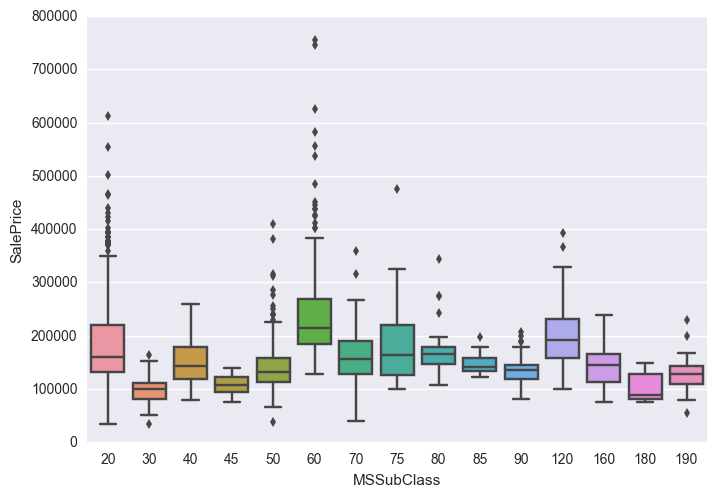

In [5]:
#0.MSSubClass : 유의미해보임
sns.boxplot('MSSubClass', 'SalePrice', data=df)
plt.show()

In [44]:
#1.MSZoning : 유의미
print df['MSZoning'].value_counts()
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.show()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [45]:
# 2.Street : 카테고리간 편차가 극심해서 삭제
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [24]:
#3.Alley : 1400/1500 데이터가 빈값이어서 삭제
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
#4.LotShape : 카테고리간 차이가 유의미하지 않아서 삭제
sns.boxplot(x='LotShape',y='SalePrice', data=df)
plt.show()

In [ ]:
#5.LandContour : 차이가 유의미하지 않아서 삭제
sns.boxplot('LandContour', 'SalePrice', data=df)
plt.show()

### 1_1 Boxplot of category datas
- idx = [9,10,11,12,13,14,15,16,17,18,21,22,23,24,25,27,28,29,30,31,32,33,35,39,40,41,42,53,55,57,58,60,63,64,65,72,73,74,78,79]
- 카테고리별 차이가 있어보임
 + Neighborhood(12), OverallQual(17), (MasVnrType(25)), ExterQual(27), BsmtQual(30), (BsmtExposure(32)), KitchenQual,  Garage Type, GarageFinish
- 카테고리를 통합하면 결과가 향상될것 같다
 + Exterior1st, Exterior2nd, BsmtFinType1, (PavedDrive), SaleType, SaleCondition, HeatingQC(40)
- 카테고리별 차이가 없다
 + Utilities, LotConfig, LandSlope, Condition1, Condition2, OverallCond, RoofStyle,  BsmtCond, CentralAir, Electrical, BldgType, HouseStyle, RoofMatl, ExterCond, BsmtType2, Heating, Functional, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence, (Foundation)

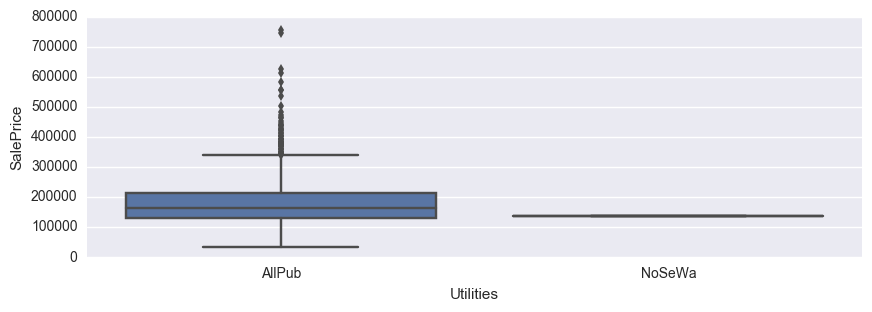

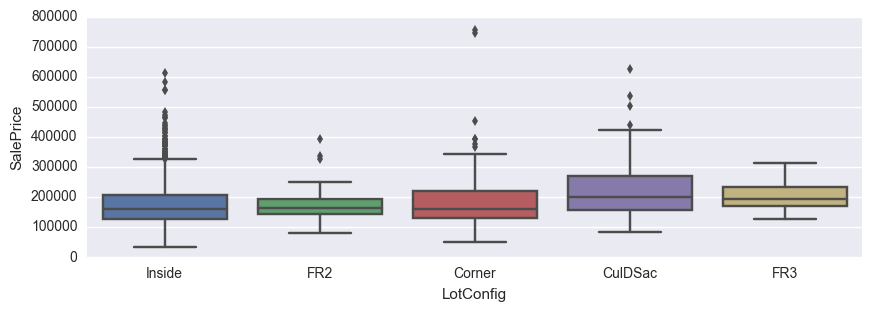

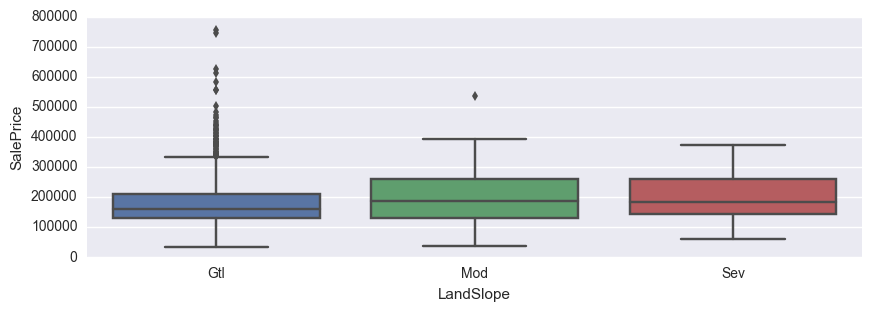

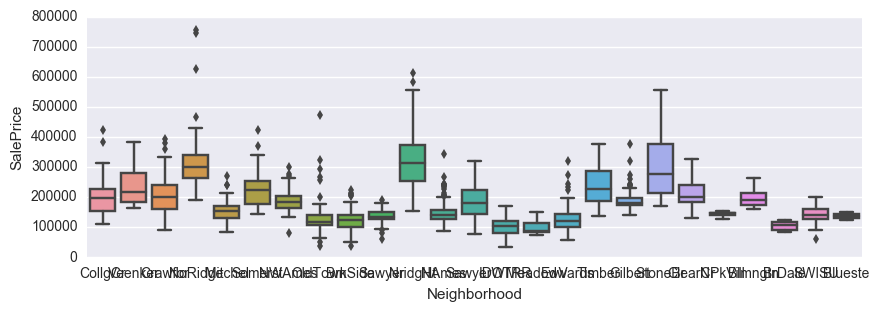

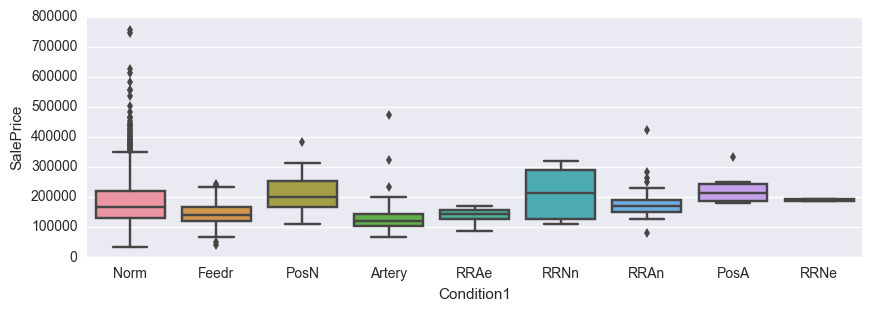

In [43]:
lst = list(df.columns)
for i in range(5):
    idx = [9,10,11,12,13]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(5,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

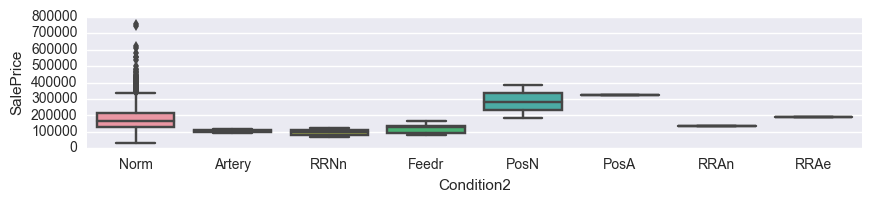

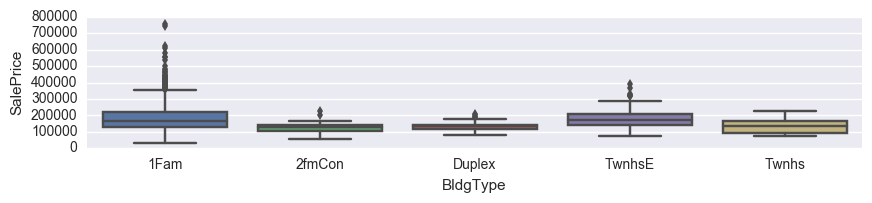

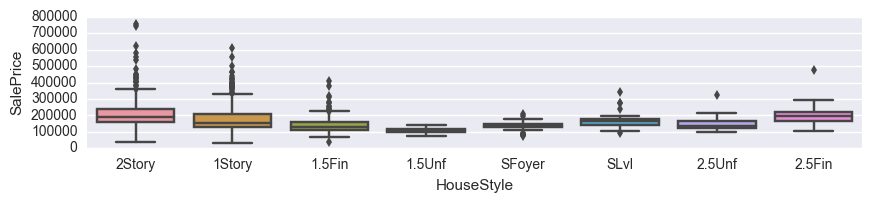

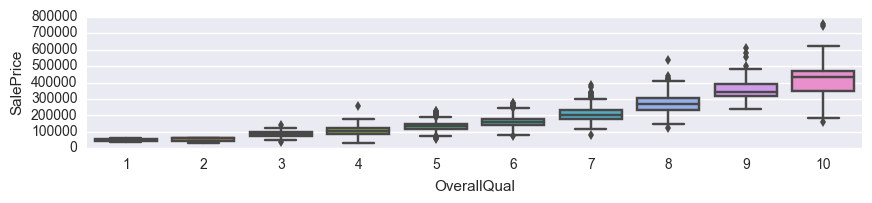

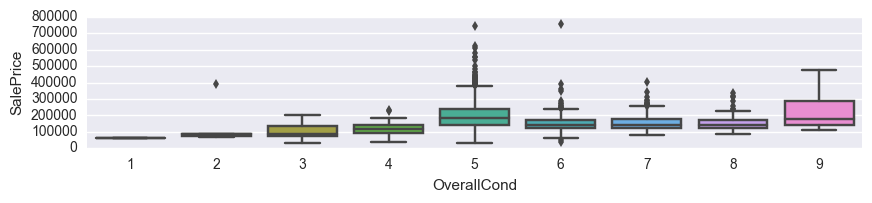

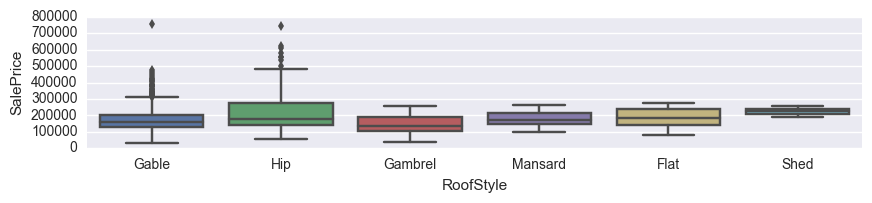

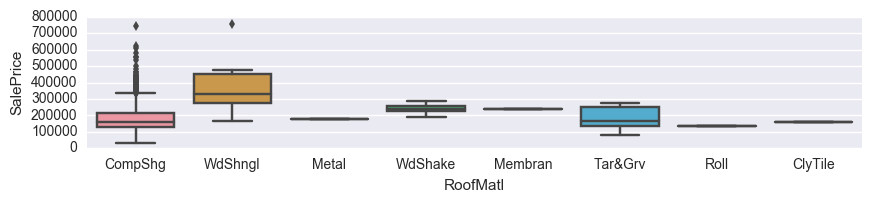

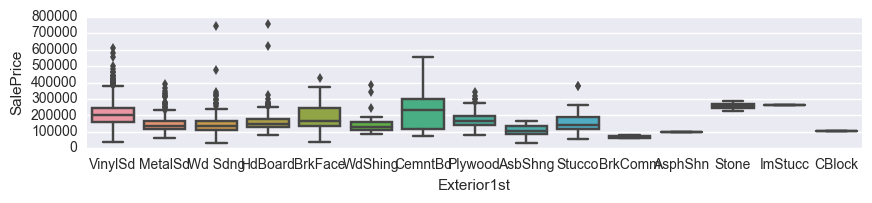

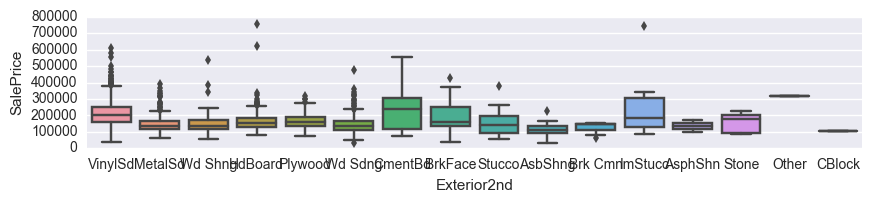

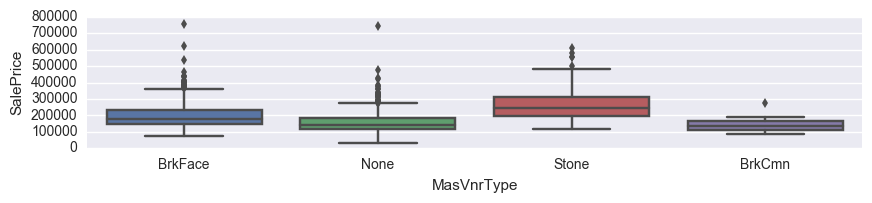

In [58]:
lst = list(df.columns)
for i in range(10):
    idx = [14,15,16,17,18,21,22,23,24,25]
    x = idx[i]
    plt.figure(figsize=(10,20))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

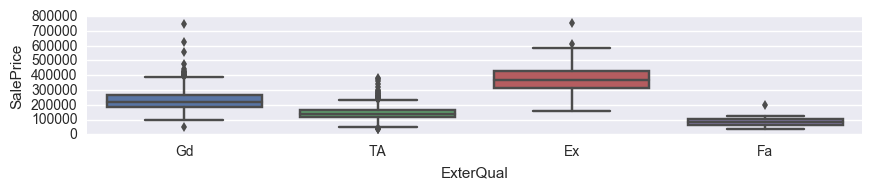

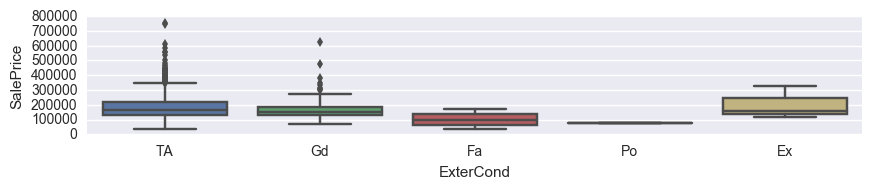

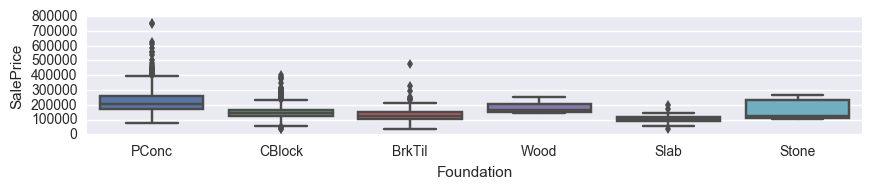

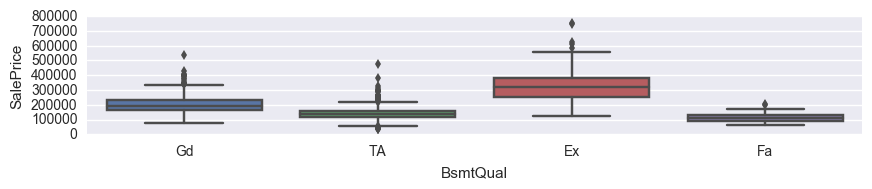

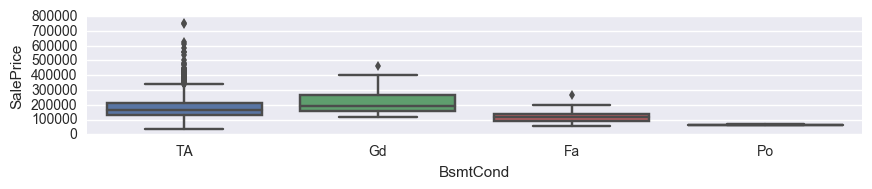

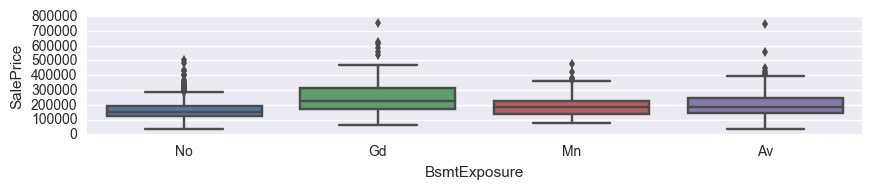

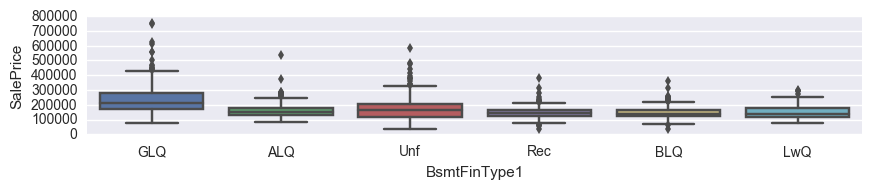

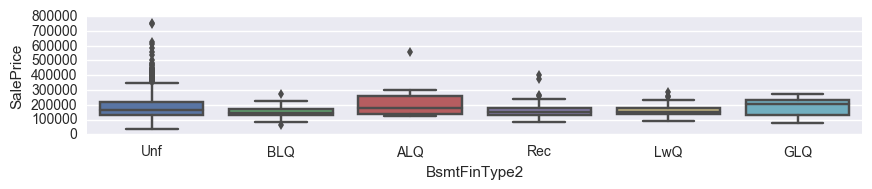

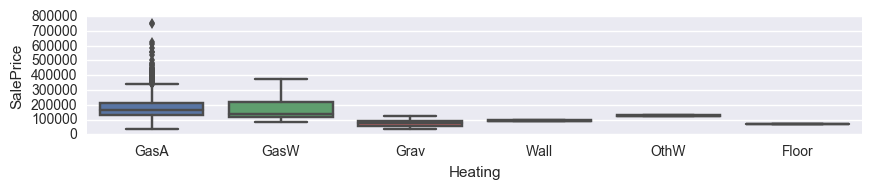

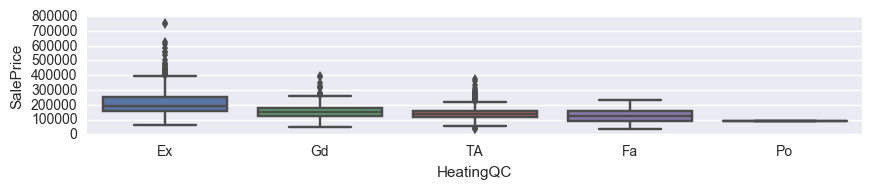

In [69]:
lst = list(df.columns)
for i in range(10):
    idx = [27,28,29,30,31,32,33,35,39,40]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

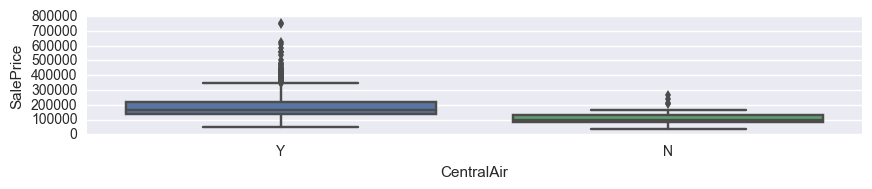

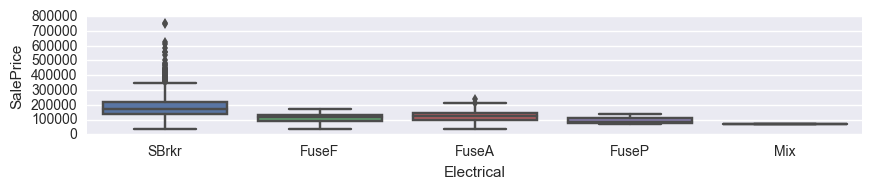

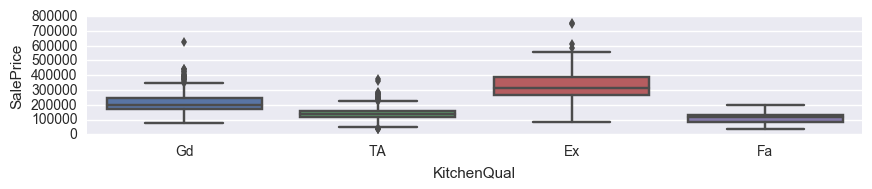

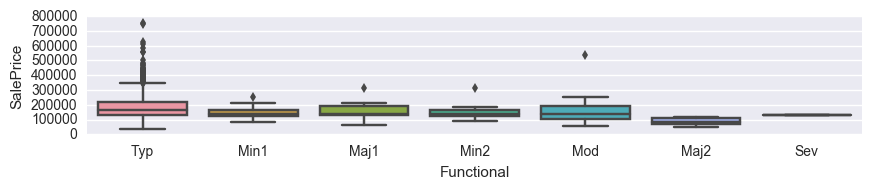

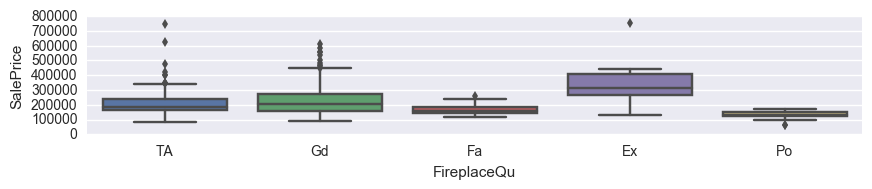

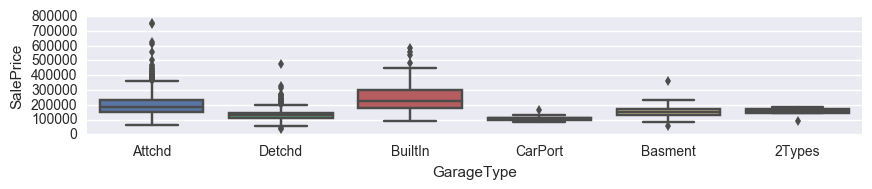

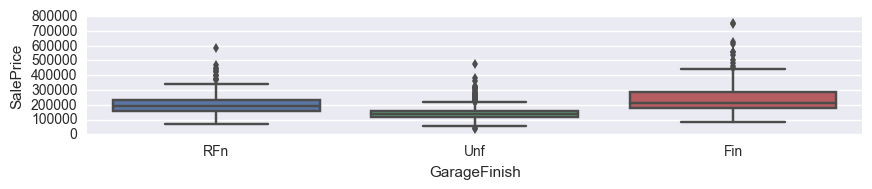

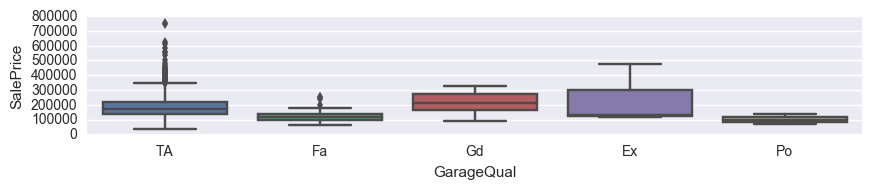

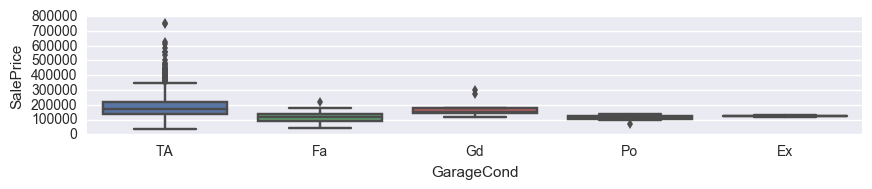

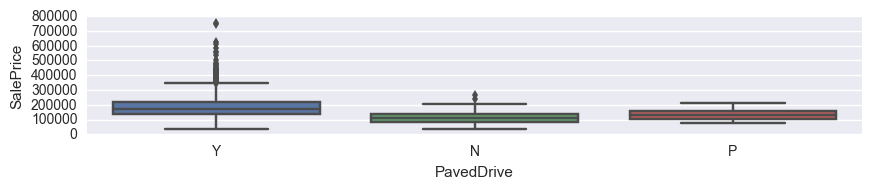

In [82]:
lst = list(df.columns)
for i in range(10):
    idx = [41,42,53,55,57,58,60,63,64,65]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(10,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

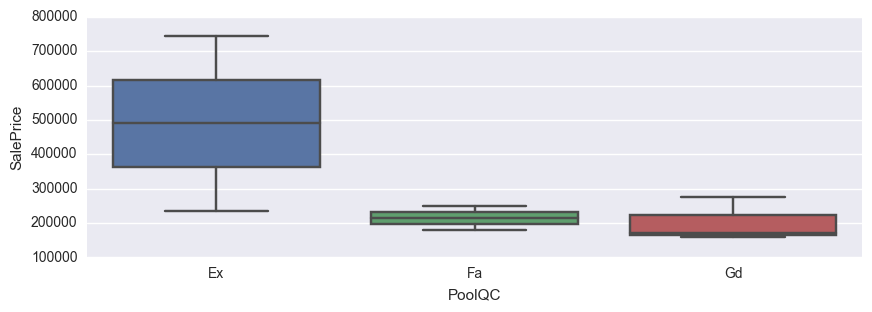

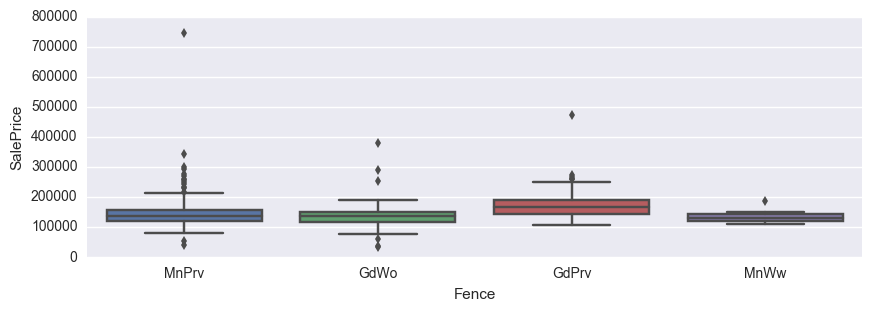

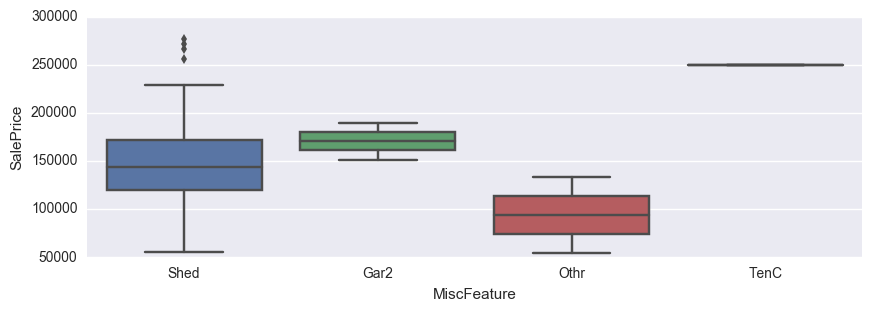

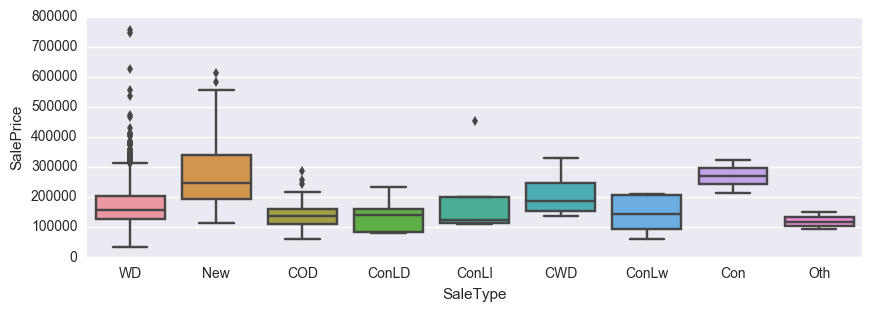

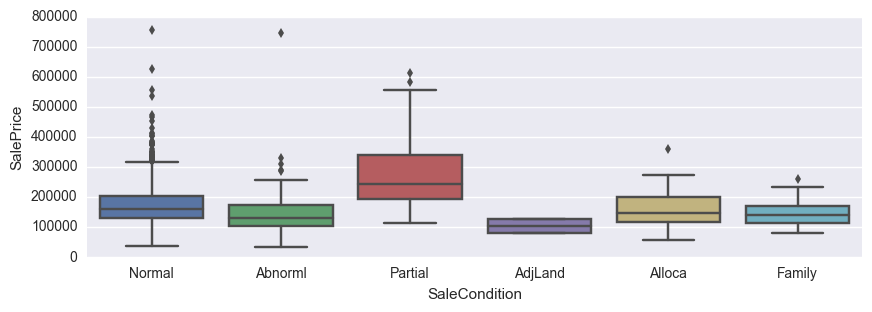

In [94]:
lst = list(df.columns)
for i in range(5):
    idx = [72,73,74,78,79]
    x = idx[i]
    plt.figure(figsize=(10,18))
    plt.subplot(5,1,i+1)
    sns.boxplot(x=lst[x], y='SalePrice', data=df)
plt.show()

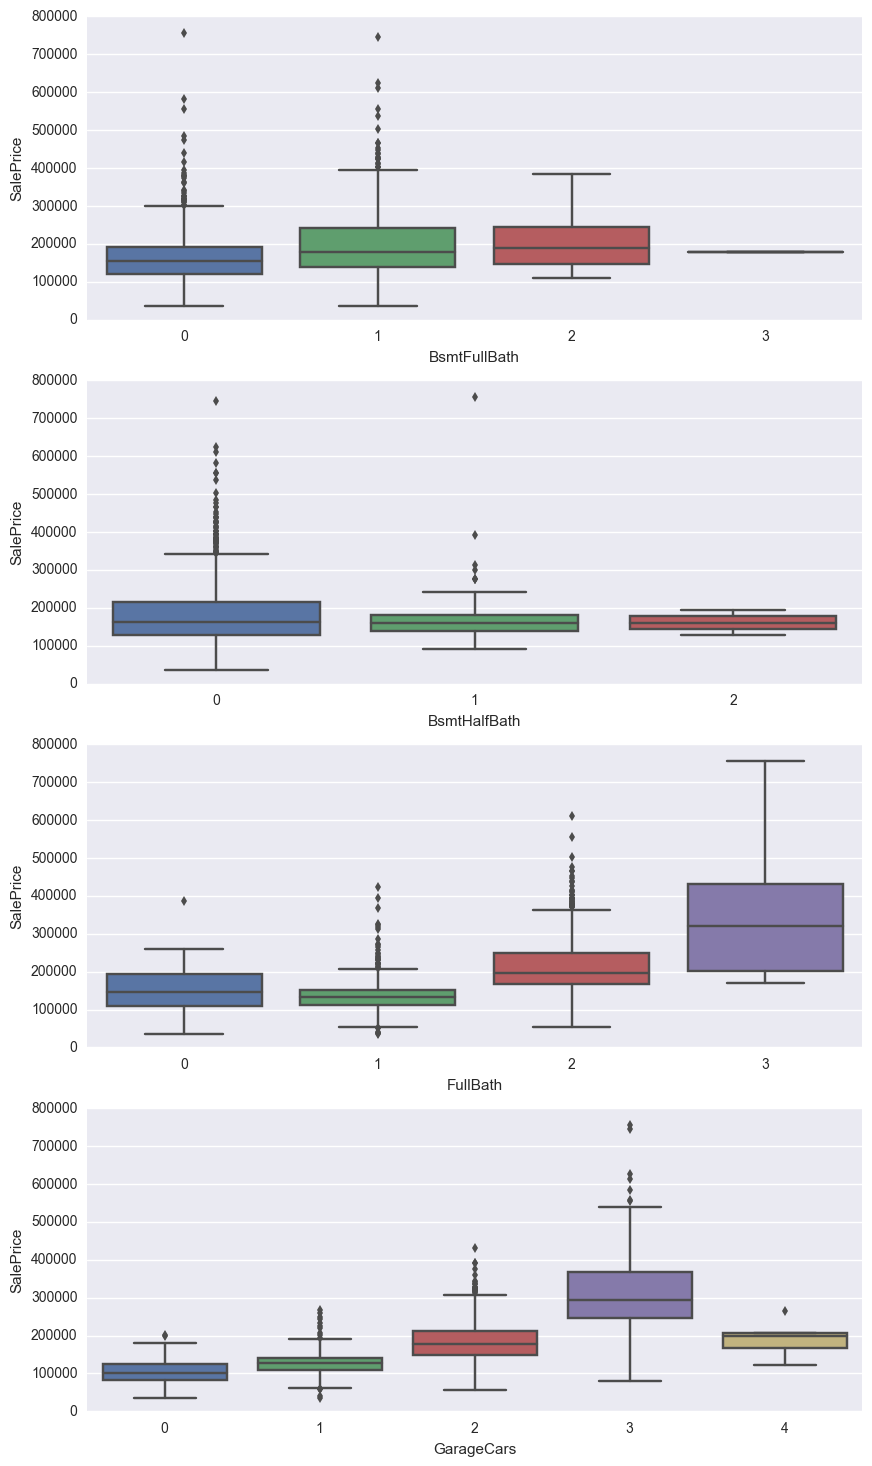

In [5]:
lst = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'GarageCars']
plt.figure(figsize=(10,18))
plt.subplot(411); sns.boxplot('BsmtFullBath', 'SalePrice', data=df)
plt.subplot(412); sns.boxplot('BsmtHalfBath', 'SalePrice', data=df)
plt.subplot(413); sns.boxplot('FullBath', 'SalePrice', data=df)
plt.subplot(414); sns.boxplot('GarageCars', 'SalePrice', data=df)
plt.show()

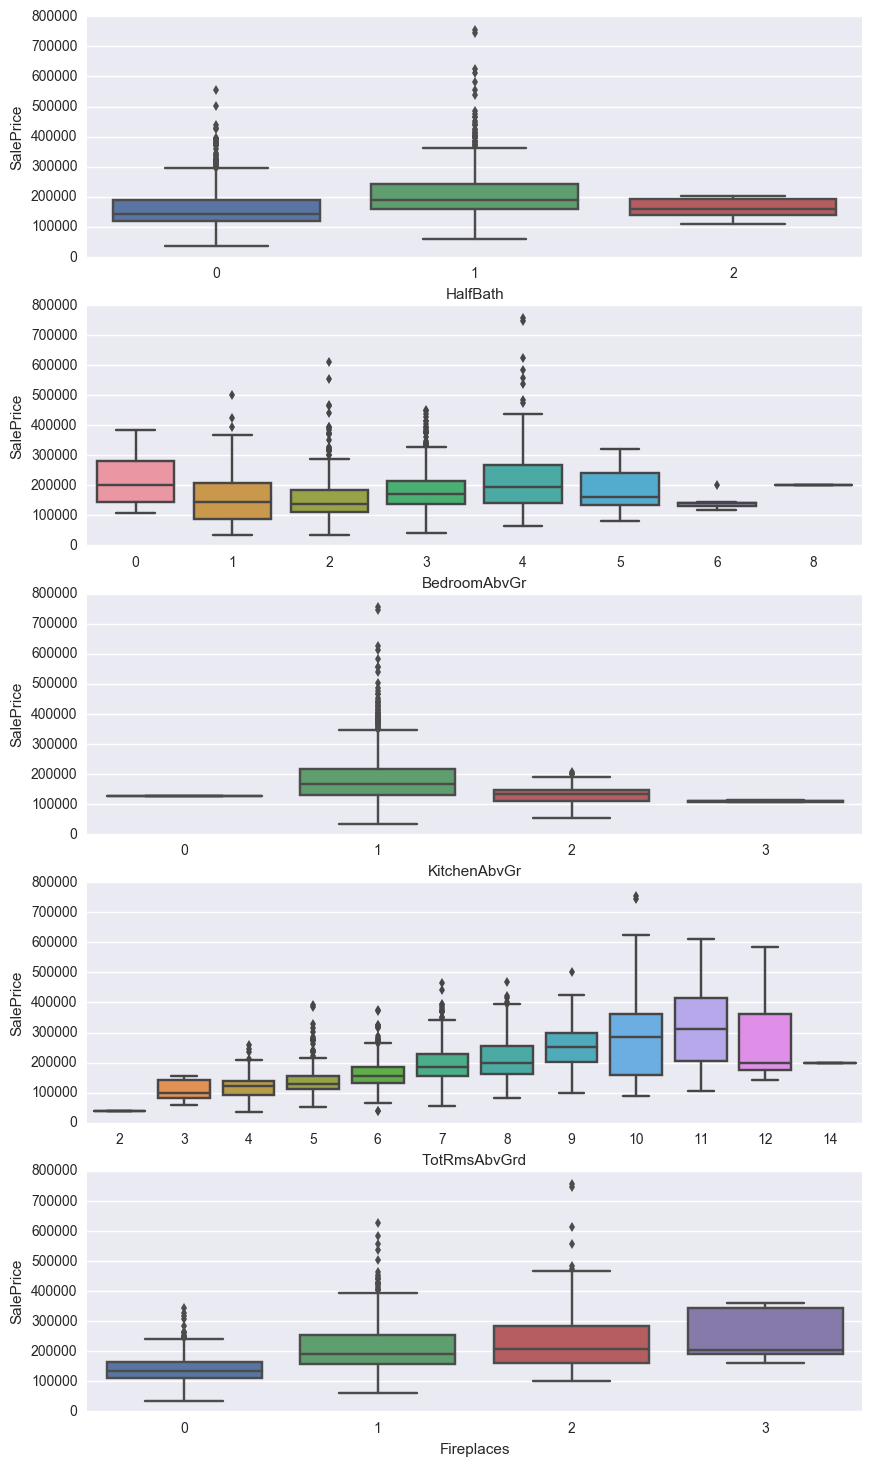

In [20]:
plt.figure(figsize=(10,18))
idx = [50,51,52,54,56]
for i in range(5):
    x=idx[i]
    plt.subplot(5,1,i+1)
    sns.boxplot(df.columns[x], 'SalePrice', data=df)
plt.show()

### 1_2 ScatterPlot
- 유의미한 데이터 : BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, (GarageArea), (FullBath), GarageCars, (TotRmsAbvGrd), (Fireplaces)
- 상관관계가 적다 : YearBuilt, YearRemodAdd, MasVnrArea, GarageYrBlt, WoodDeckSF, OpenPorchSF, HalfBath, BedroomAbvGr
- 상관관계가 없다 : BsmtFinSF2, BsmtUnfSF, LowQualFinSF, EnclosePorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, BsmtFullBath, BsmtHalfBath, KitchenAbvGr
- log 변환 해볼까? : LotFrontage, LotArea

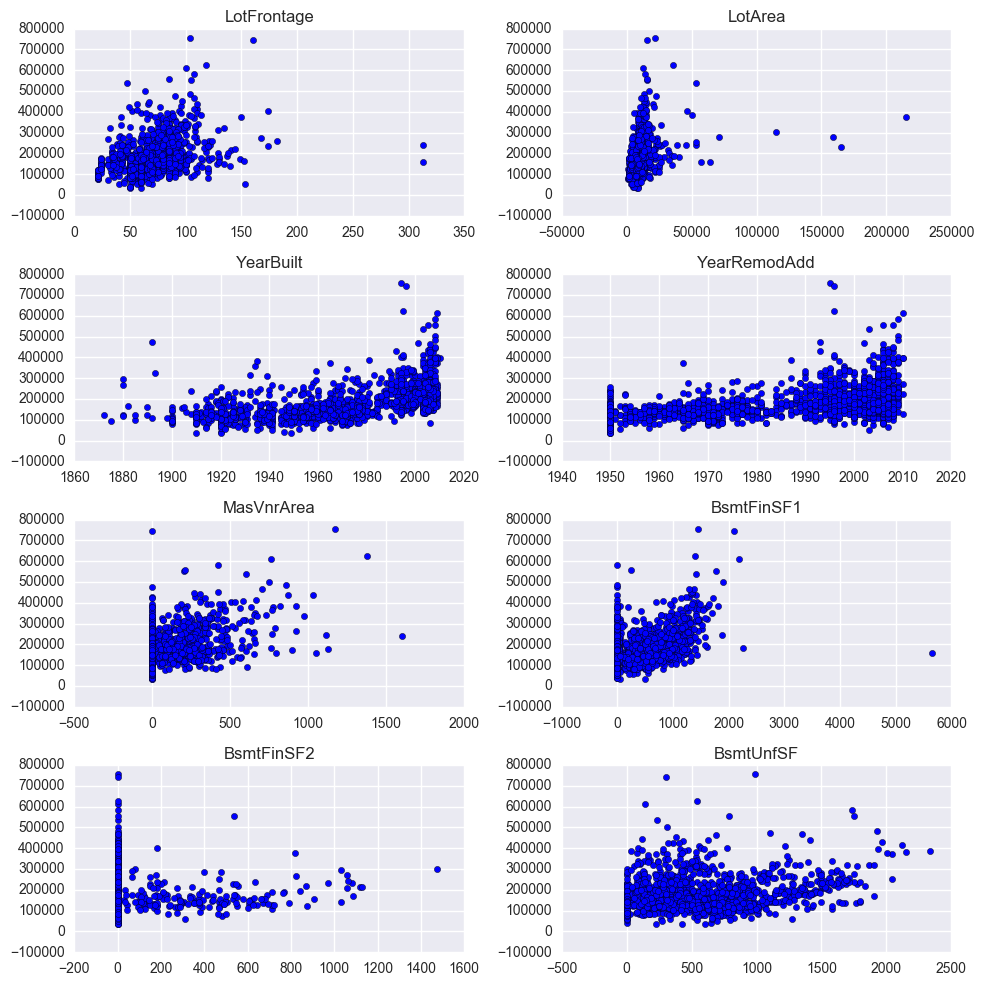

In [56]:
idx = [3,4,19,20,26,34,36,37,38,43,44,45,46,47,48,49,50,51,52,54,56,59,61,62,66,67,68,69,70,71,75]
plt.figure(figsize=(10,10))
for i in range(8):
    x = idx[i]
    plt.subplot(4,2,i+1)
    plt.scatter(df.columns[x],'SalePrice',data=df)
    plt.title(df.columns[x])
plt.tight_layout()
plt.show()

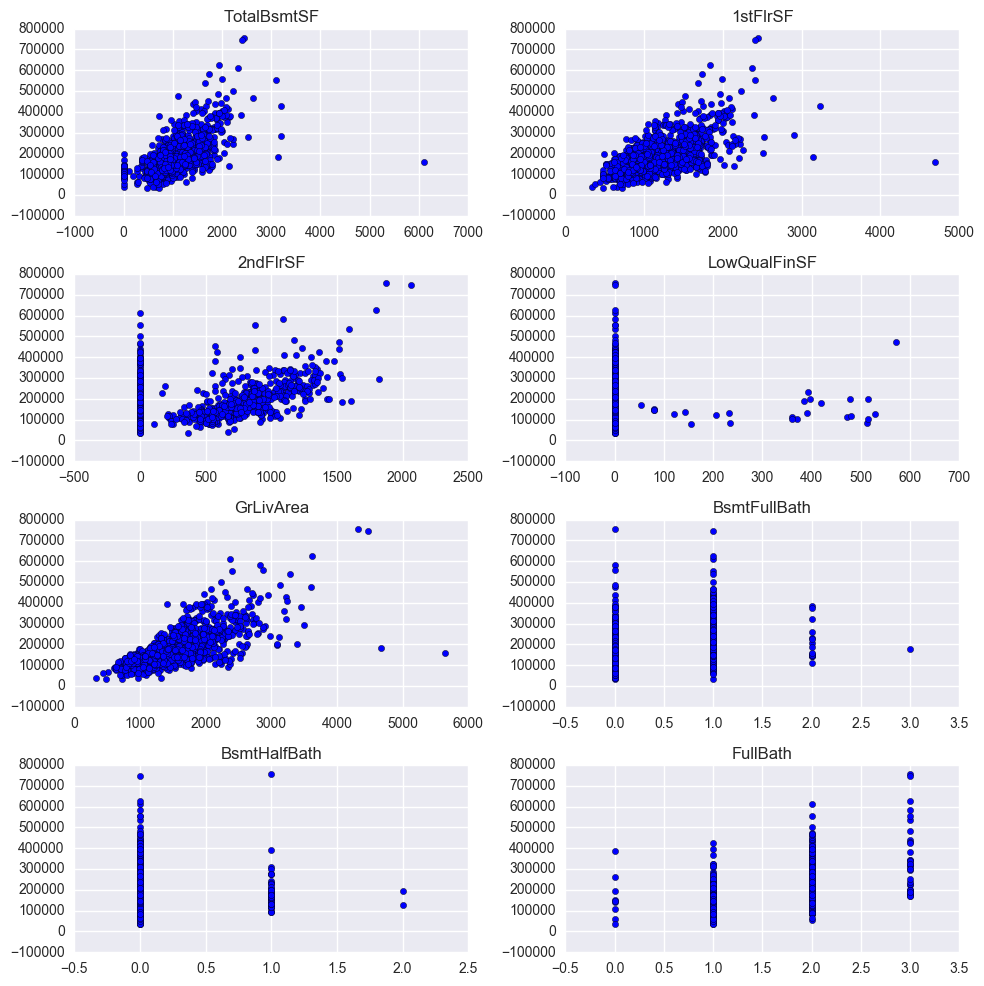

In [58]:
plt.figure(figsize=(10,10))
for i in range(8,16):
    x = idx[i]
    plt.subplot(4,2,i-7)
    plt.scatter(df.columns[x],'SalePrice',data=df)
    plt.title(df.columns[x])
plt.tight_layout()
plㅐt.show()

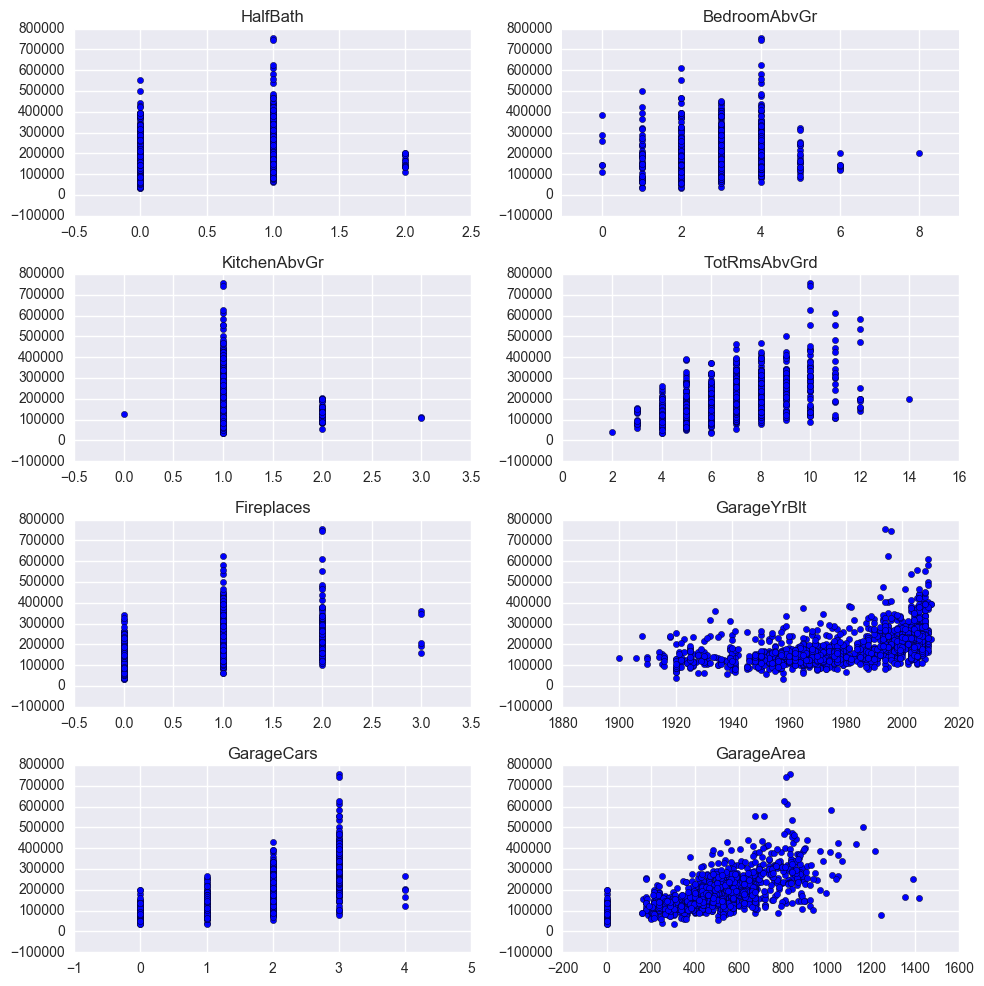

In [59]:
plt.figure(figsize=(10,10))
for i in range(16,24):
    x = idx[i]
    plt.subplot(4,2,i-15)
    plt.scatter(df.columns[x],'SalePrice',data=df)
    plt.title(df.columns[x])
plt.tight_layout()
plt.show()

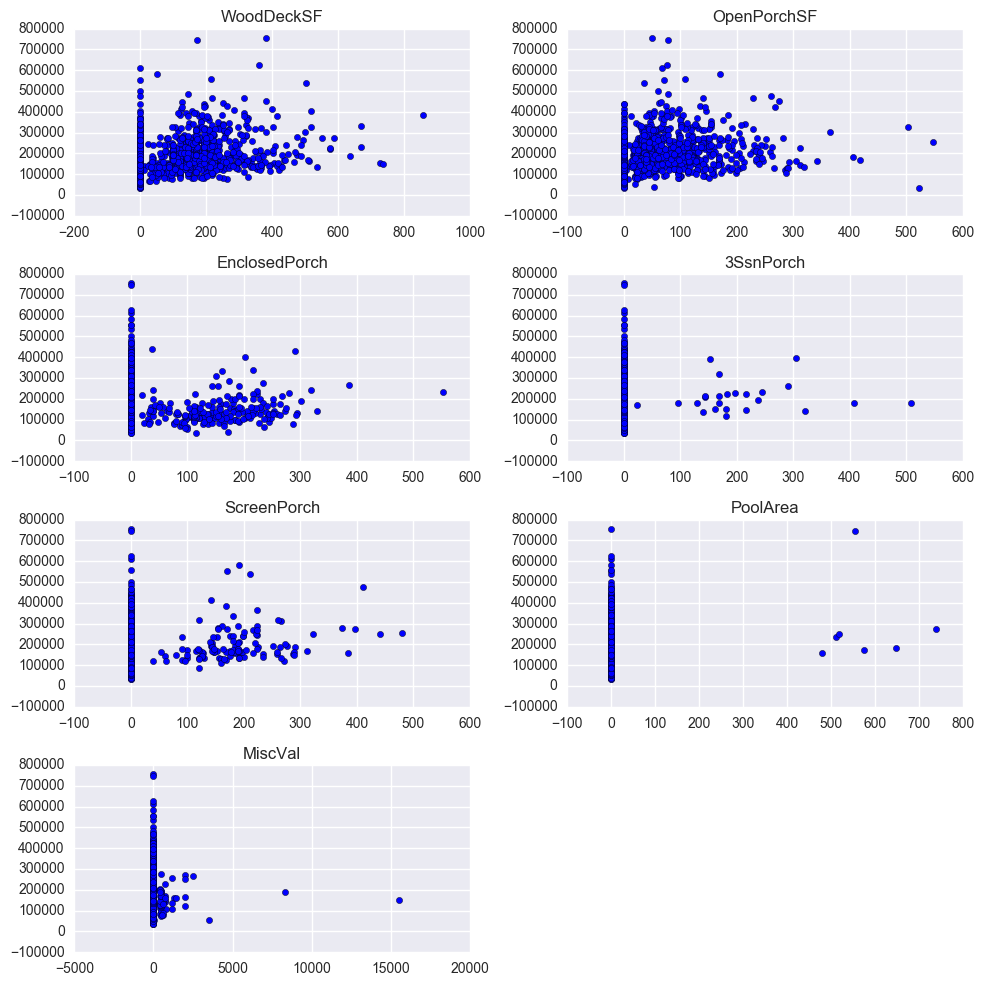

In [63]:
plt.figure(figsize=(10,10))
for i in range(24,31):
    x = idx[i]
    plt.subplot(4,2,i-23)
    plt.scatter(df.columns[x],'SalePrice',data=df)
    plt.title(df.columns[x])
plt.tight_layout()
plt.show()

In [76]:
#최종 선택한 유의미한 변수
lst_numerical=['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'FullBath',
             'GarageCars', 'TotRmsAbvGrd', 'Fireplaces', 'OverallQual']
lst_categorical=['MSSubClass','MSZoning', 'Neighborhood','MasVnrType', 'ExterQual',
                 'Foundation','BsmtQual', 'HeatingQC', 'KitchenQual', 'GarageType']

## 2 Preprocessing

In [46]:
def preprocess(train, test):
    lst_selected =['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'FullBath','GarageCars', 'TotRmsAbvGrd', 'Fireplaces', 'OverallQual',
                   'MSSubClass','MSZoning', 'Neighborhood','MasVnrType', 'ExterQual', 'Foundation','BsmtQual','HeatingQC','KitchenQual', 'GarageType']
    lst_numerical=['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'FullBath','GarageCars', 'TotRmsAbvGrd', 'Fireplaces', 'OverallQual']
    lst_categorical=['MSSubClass','MSZoning', 'Neighborhood','MasVnrType','ExterQual', 'Foundation','BsmtQual','HeatingQC','KitchenQual', 'GarageType']

    df_c = train[lst_selected]
    test = test[lst_selected]

    skewness = df_c[lst_numerical].apply(lambda x : skew(x.dropna()))
    skew_idx = skewness[skewness>0.75].index
    df_c[skew_idx] = np.log1p(df_c[skew_idx])
    test[skew_idx] = np.log1p(test[skew_idx])

    null_features = df_c.isnull().sum()[df_c.isnull().sum()!=0].index
    for feat in null_features:
        df_c[feat].fillna(df_c[feat].mode().values[0], inplace=True)

    for feat in lst_numerical:
        test[feat].fillna(test[feat].median(), inplace=True)
    for feat in lst_categorical:
        test[feat].fillna(test[feat].mode().values[0], inplace=True)

    X_train=pd.get_dummies(df_c)
    X_test=pd.get_dummies(test)

    y_train=np.log1p(train.SalePrice)

    return X_train, X_test, y_train

## 3 Run OLS

In [98]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
X_train, X_test, y_train = preprocess(df_train, df_test)

In [99]:
model = sm.OLS(y_train, X_train)
result = model.fit()
train_pred = result.predict(X_train)
print 'RMSE: ', np.sqrt(((np.log1p(df_train.SalePrice.values) - train_pred)**2).mean())
#print result.summary()

RMSE:  0.131724566335


### 3_1 p_value가 낮은 변수들 제거

In [100]:
drop_lst = result.pvalues[result.pvalues > 0.05].index
X_train.drop(drop_lst, axis=1, inplace=True)
X_test.drop(drop_lst, axis=1, inplace=True)

In [105]:
model = sm.OLS(y_train, X_train)
result = model.fit()
train_pred = result.predict(X_train)
print 'RMSE: ', np.sqrt(((np.log1p(df_train.SalePrice.values) - train_pred)**2).mean())
#print result.summary()

RMSE:  0.0981908127467


### 3_2 Outlier 제거

In [102]:
influence = result.get_influence()
cook0, p_val = influence.cooks_distance
idx = np.where(cook0>4/float(len(y_train)-2))[0]

X_train.drop(idx, axis=0, inplace=True)
y_train.drop(idx, axis=0, inplace=True)
df_train.drop(idx, axis=0, inplace=True)

In [104]:
model = sm.OLS(y_train, X_train)
result = model.fit()
train_pred = result.predict(X_train)

print 'RMSE: ', np.sqrt(((np.log1p(df_train.SalePrice.values) - train_pred)**2).mean())
#print result.summary()

RMSE:  0.0981908127467


## 4 Lasso

In [117]:
def preprocess2(train, test):
    all_data = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']])
    
    #log transform
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewness = all_data[numeric_feats].apply(lambda x : skew(x.dropna()))
    skewed_feats = skewness[skewness>0.75].index
    all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
    
    #encode categorical data
    all_data=pd.get_dummies(all_data)
    
    #fillna
    all_data = all_data.fillna(all_data.mean())
    
    X_train = all_data[:train.shape[0]]
    X_test = all_data[train.shape[0]:]
    y_train = np.log1p(train.SalePrice)
    
    return X_train, X_test, y_train

In [113]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso

def error(real_value, prediction):
    return mean_squared_error(real_value,prediction)**0.5

RMSE = make_scorer(error, greater_is_better=False)

### 4_1 Run Lasso
+ 최적 alpha 값을 구한 후 유의미한 변수를 시각화

In [132]:
lasso = Lasso(random_state=0)
model = GridSearchCV(estimator=lasso, param_grid={'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]}, cv=5, scoring=RMSE)
model.fit(X_train, y_train)
print model.best_score_
print model.best_params_

-0.122533969794
{'alpha': 0.0005}


In [122]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
X_train, X_test, y_train = preprocess2(df_train, df_test)

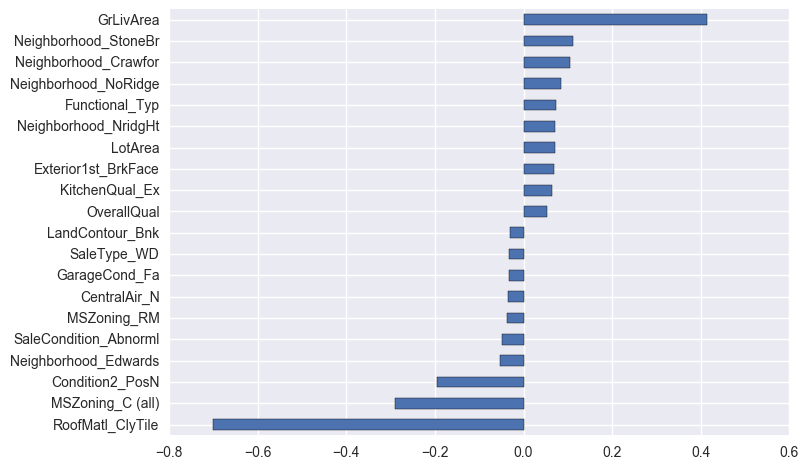

In [133]:
lss = Lasso(alpha=0.0005, random_state=0)
lss.fit(X_train, y_train)

coef = pd.Series(lss.coef_, index=X_train.columns)
coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

coef.plot(kind = 'barh')
plt.show()